## Sähkölinjat

* Apuja koordinaattien ja polygonien visualisointiin http://geojson.io
* OSM-Objektien kaappaamista https://overpass-turbo.eu/
* Tagit https://wiki.openstreetmap.org/wiki/Key:power

### Tavoite
* Sähkölinjat on maskattu omassa kuvassa
* NDVI arvo B08 ja B04 kuvista


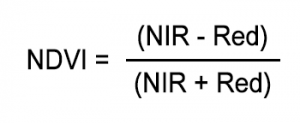



In [1]:
%config IPCompleter.greedy=True

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
from PIL import Image
import utm
import time
import cv2
import scipy.sparse
import sys
import glob
import os
import io

In [3]:
# Satelliittikuvan alue
points = np.array([
            [
              65.80591820047655, 24.8120825440702
            ],
            [
              65.8214035188828, 27.213549565024742
            ],
            [
              64.8362407624999, 27.20571148892141
            ],
            [
              64.8214388312971, 24.892314281559564 # origo 0,0
            ],
            [
              65.80591820047655, 24.8120825440702
            ]
          ]);

### Maskitiedosto

In [4]:
sp_mask = scipy.sparse.load_npz('powerline_mask.npz')

### Funktiot: ZIP-tiedoston luku, kuvan maskaus ja outlierien poisto

In [5]:
def getImageFromZip(file_name, suffix="_B08.jp2"):
    arr = np.empty(0);
    try:

        with ZipFile(file_name, 'r') as zip:
            for file_or_dir in zip.filelist:
                if (suffix in file_or_dir.filename):
                    fn = file_or_dir.filename;
                    data = zip.read(fn);
                    arr = np.array(Image.open(io.BytesIO(data)));
    except:
        print("Error while reading file");
    return arr;
        

In [6]:
def getMaskedImage(img, mask):
    arr = cv2.bitwise_and(img, img, mask=mask.toarray())
    return arr

In [7]:
def rejectOutliers(data, m = 2.):
    d = np.abs(data - np.median(data));
    mdev = np.median(d);
    s = d/mdev if mdev else 0.;
    return data[s<m];

### Kuva zipissä CSR-muotoon

In [12]:
transferred = [];

In [16]:
for file_name in glob.glob('./history/*.zip'):
    print(file_name);
    if (os.stat(file_name).st_size > 1024) and not (file_name in transferred):
        b08 = getImageFromZip(file_name, suffix="_B08.jp2");
        b04 = getImageFromZip(file_name, suffix="_B04.jp2");
        transferred.append(file_name);
        if (len(b08) > 0 and len(b04) > 0):
            b08_masked = getMaskedImage(b08, sp_mask);
            b04_masked = getMaskedImage(b04, sp_mask);
            masked = (b08_masked-b04_masked)/(b08_masked+b04_masked)
            fn = "./masked_matrices/%s_ndvi.npz" % file_name[10:-4];
            sp_masked = scipy.sparse.csr_matrix(masked);
            scipy.sparse.save_npz(fn, sp_masked);
            
    else:
        print("Corrupted file or already tranferred");

./history/S2A_MSIL1C_20190227T095031_N0207_R079_T35WMN_20190227T114818.zip
Corrupted file or already tranferred
./history/S2A_MSIL1C_20190911T101021_N0208_R022_T35WMN_20190911T135617.zip
Corrupted file or already tranferred
./history/S2A_MSIL1C_20160320T101022_N0201_R022_T35WMN_20160320T101017.zip
Corrupted file or already tranferred
./history/S2A_MSIL1C_20190707T095031_N0207_R079_T35WMN_20190707T102616.zip
Corrupted file or already tranferred
./history/S2A_MSIL1C_20190421T100031_N0207_R122_T35WMN_20190421T121337.zip
Corrupted file or already tranferred
./history/S2A_MSIL1C_20160426T100032_N0201_R122_T35WMN_20160426T100128.zip
Corrupted file or already tranferred
./history/S2A_MSIL1C_20160402T102022_N0201_R065_T35WMN_20160402T102020.zip
Corrupted file or already tranferred
./history/S2A_MSIL1C_20160203T095222_N0201_R079_T35WMN_20160203T095217.zip
Corrupted file or already tranferred
./history/S2A_MSIL1C_20190925T095031_N0208_R079_T35WMN_20190925T132828.zip
Corrupted file or already tra

/home/mlahdeaho/anaconda3/envs/cudf/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


./history/S2A_MSIL1C_20190319T095031_N0207_R079_T35WMN_20190319T115458.zip
./history/S2A_MSIL1C_20160303T102022_N0201_R065_T35WMN_20160303T102108.zip
./history/S2A_MSIL1C_20150724T101006_N0204_R022_T35WMN_20150724T101008.zip
./history/S2A_MSIL1C_20190812T101031_N0208_R022_T35WMN_20190812T135704.zip
./history/S2A_MSIL1C_20150916T095016_N0204_R079_T35WMN_20150916T095014.zip
./history/S2A_MSIL1C_20181013T100021_N0206_R122_T35WMN_20181013T103921.zip
./history/S2A_MSIL1C_20160503T095032_N0202_R079_T35WMN_20160503T095034.zip
./history/S2A_MSIL1C_20180926T101021_N0206_R022_T35WMN_20180926T155624.zip
./history/S2A_MSIL1C_20150919T100016_N0204_R122_T35WMN_20150919T100018.zip
./history/S2A_MSIL1C_20150728T095006_N0204_R079_T35WMN_20150728T095006.zip
./history/S2A_MSIL1C_20190521T100031_N0207_R122_T35WMN_20190521T121442.zip
./history/S2A_MSIL1C_20180811T095031_N0206_R079_T35WMN_20180811T120020.zip
./history/S2A_MSIL1C_20160327T100012_N0201_R122_T35WMN_20160327T100012.zip
./history/S2A_MSIL1C_2016

### Pikselin hajonta partitioittain (10 x 10) historiallisilla tiedoilla
* Partitioiden määrä riippuu käytettävästä muistin määrästä, esim.
 * 10 x 10 vaatii 3-4 GB RAM
 * 5 x 5 vaatii 8-10 GB RAM

In [106]:
final = np.empty((10980, 10980, 3));

In [107]:
h = int(sp_mask.shape[0] / 4);
w = int(sp_mask.shape[1] / 4);

for y in range(0, sp_mask.shape[0], h):
    for x in range(0, sp_mask.shape[1], w):
        print(x, y);
        for rootdir, dirs, files in os.walk("./masked_matrices"):
            
            part = np.empty((h, w, len(files)));
            
            for i, fn in enumerate(files):
                sp_img = scipy.sparse.load_npz(os.path.join(rootdir, fn));
                part[:,:,i] = sp_img.toarray()[y:(y+h),x:(x+w)];
                part[part == 0] = np.nan;
                
        res = np.nanquantile(part, [0.25, 0.5, 0.75], axis=2);
        final[y:(y+h), x:(x+w), :] = res.transpose(1, 2, 0);
                

0 0
2745 0
5490 0
8235 0
0 2745
2745 2745
5490 2745
8235 2745
0 5490
2745 5490
5490 5490
8235 5490
0 8235
2745 8235
5490 8235
8235 8235


In [135]:
plt.rcdefaults()
plt.rcParams["figure.figsize"] = (20,20)

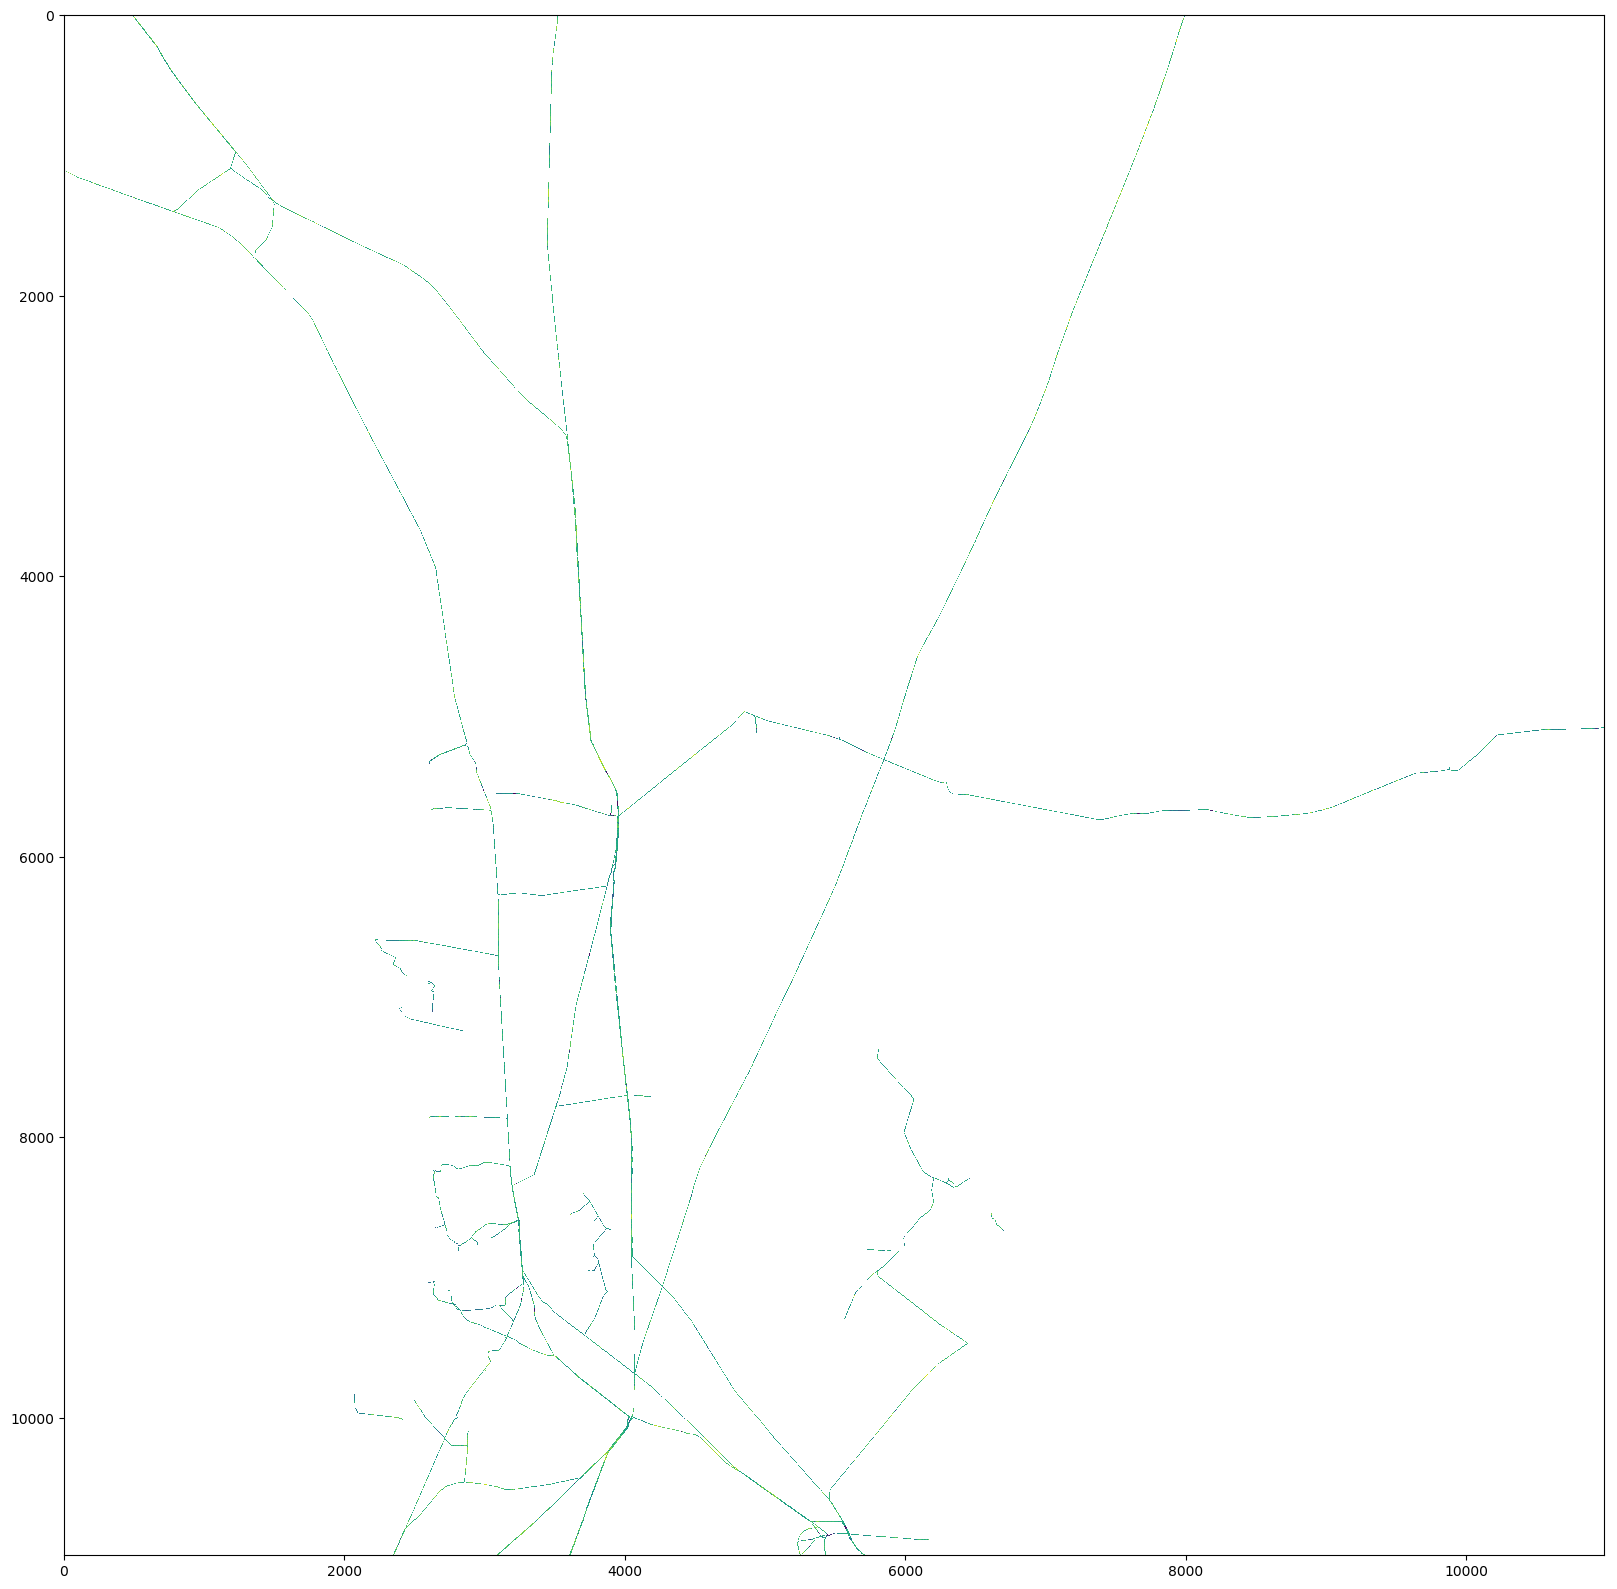

In [136]:
plt.imshow(final[:,:,0])
plt.show()

In [108]:
cv2.imwrite("powerline_elevations_dist.png", final);

In [109]:
np.save("powerline_elevations_dist.npy", final)